# Imports

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zipfile as zf

# Utility

In [4]:
def extract(path, filename):
    archive = zf.ZipFile(path)
    file = archive.open(filename)
    return file

# Reading in Data

In [6]:
surveys = list()
surveys.append(pd.read_csv(extract("../data/StackOverflowSurvey2019.zip", "survey.csv")))
surveys.append(pd.read_csv(extract("../data/StackOverflowSurvey2020.zip", "survey.csv")))
surveys.append(pd.read_csv(extract("../data/StackOverflowSurvey2021.zip", "survey.csv")))
surveys.append(pd.read_csv(extract("../data/StackOverflowSurvey2022.zip", "survey.csv")))
surveys.append(pd.read_csv(extract("../data/StackOverflowSurvey2023.zip", "survey.csv")))

# Counting Data

In [8]:
regions = list()
for i in range(5):
    regions.extend(surveys[i]['Country'].fillna('').tolist())
region_counts = dict.fromkeys(regions, 0)
for region in regions:
    region_counts[region] += 1
region_counts

{'United Kingdom': 9633,
 'Bosnia and Herzegovina': 524,
 'Thailand': 937,
 'United States': 33418,
 'Ukraine': 3643,
 'Canada': 14595,
 'India': 40239,
 'New Zealand': 2511,
 'Antigua and Barbuda': 20,
 'Germany': 28104,
 'Australia': 8297,
 'Russian Federation': 6583,
 'Brazil': 10171,
 'Lithuania': 1156,
 'Israel': 4234,
 'South Africa': 2758,
 'Colombia': 1785,
 'Turkey': 4681,
 'Switzerland': 4610,
 'Argentina': 2635,
 'Sri Lanka': 1576,
 'Czech Republic': 3820,
 'Denmark': 3010,
 'Malaysia': 1333,
 'Bangladesh': 3021,
 'Spain': 7605,
 'Serbia': 1717,
 'Poland': 9172,
 'Sweden': 6017,
 'China': 3379,
 'France': 12258,
 'Netherlands': 8905,
 'Italy': 7708,
 'Philippines': 1888,
 'Ireland': 2127,
 'Pakistan': 3877,
 'Azerbaijan': 285,
 'Austria': 4052,
 'Estonia': 845,
 'Croatia': 1177,
 'South Korea': 983,
 'Greece': 2728,
 'Japan': 1812,
 'Romania': 3424,
 'Finland': 2617,
 'Bulgaria': 2230,
 'Viet Nam': 1688,
 'Slovenia': 1247,
 'Iran': 1229,
 'Belarus': 760,
 'Hungary': 2435,
 '

In [9]:
excluded_regions = ['']
for region in region_counts:
    if region_counts[region] < 1000:
        excluded_regions.append(region)
for region in excluded_regions:
    region_counts.pop(region)
region_counts['Iran, Islamic Republic of...'] += region_counts.pop('Iran')
region_counts['United Kingdom'] += region_counts.pop('United Kingdom of Great Britain and Northern Ireland')
region_counts['United States'] += region_counts.pop('United States of America')

In [10]:
keys = list(region_counts.keys())
keys.sort()
region_counts = {i: region_counts[i] for i in keys}

# Plotting

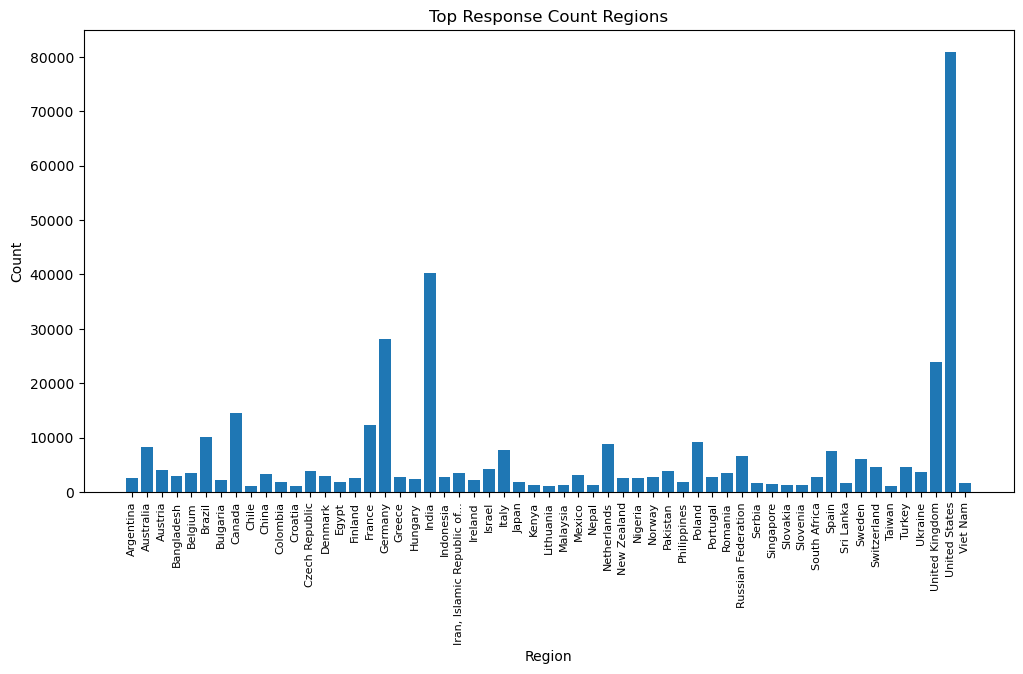

In [20]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.bar(region_counts.keys(), region_counts.values())
ax.set_title('Top Response Count Regions')
ax.set_xlabel('Region')
ax.set_ylabel('Count')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical', fontsize=8)
plt.show()